In [64]:
import numpy as np
import matplotlib.pyplot as plt
from struct import *

%matplotlib notebook

In [65]:
f = open('taros.00018.fast.log','rb')
buffer = f.read()
f.close()
print(len(buffer))

172346


In [66]:
pointer = 0
# get the signature
while buffer[pointer] != 0xa0 : pointer += 1
# get the time
t, = unpack('I', buffer[pointer+1:pointer+5])
att, head, roll = unpack('fff', buffer[pointer+5:pointer+17])
print(t,att, head, roll)

2340 -0.0 360.0 -0.0


In [73]:
time = []
attitude = []
heading = []
gtime = []
gnick = []
gyaw = []
groll = []
pointer = 0
while (pointer+17 < len(buffer)):
    if buffer[pointer] == 0xa0 :
        t, = unpack('I', buffer[pointer+1:pointer+5])
        att, head, roll = unpack('fff', buffer[pointer+5:pointer+17])
        time.append(t)
        attitude.append(att)
        heading.append(head)
        pointer = pointer+17
    elif buffer[pointer] == 0xa1 :
        t, = unpack('I', buffer[pointer+1:pointer+5])
        gtime.append(t)
        nick, yaw, roll = unpack('fff', buffer[pointer+5:pointer+17])
        gnick.append(nick)
        gyaw.append(yaw)
        groll.append(roll)
        pointer = pointer+17
    else :
        pointer = pointer+1

<IPython.core.display.Javascript object>


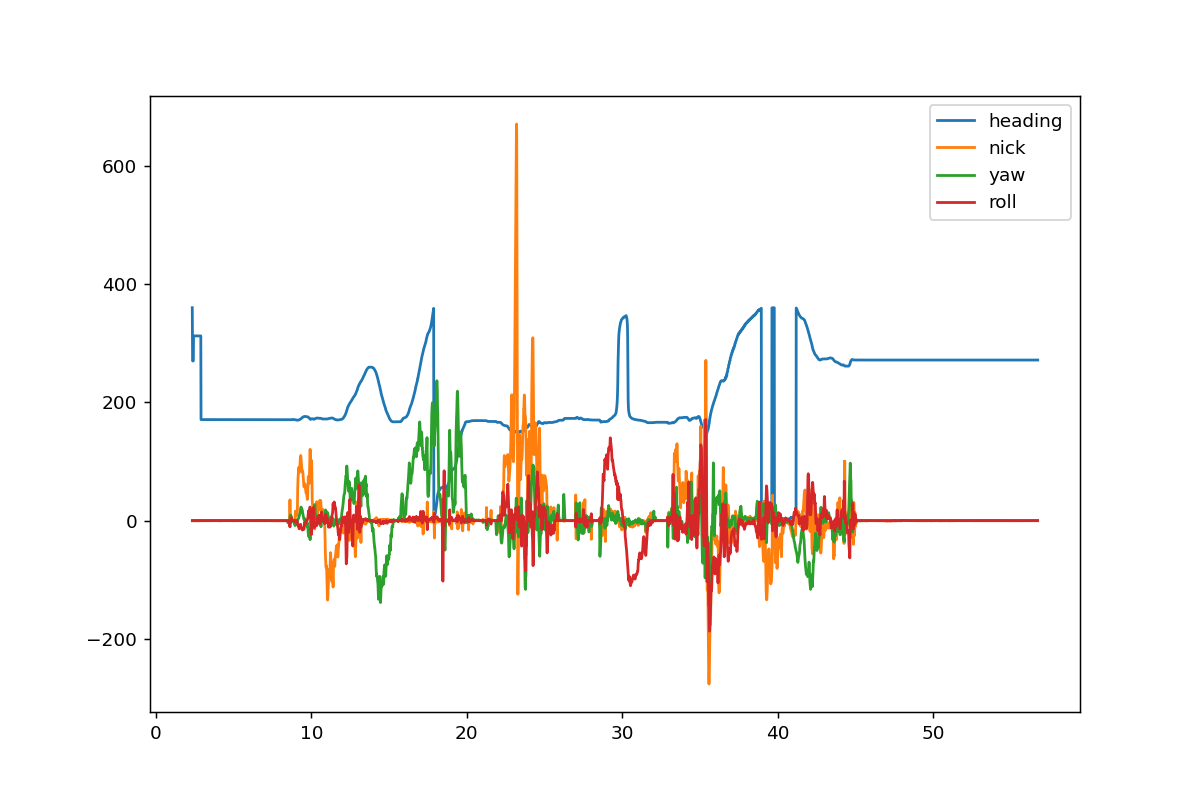

In [76]:
plt.figure(figsize=(9,6))
plt.plot(1e-3*np.array(time),heading,label='heading')
plt.plot(1e-3*np.array(gtime),np.array(gnick),label='nick')
plt.plot(1e-3*np.array(gtime),np.array(gyaw),label='yaw')
plt.plot(1e-3*np.array(gtime),np.array(groll),label='roll')
plt.legend()
plt.show()